In [79]:
#import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [30]:
#read ipl.csv file and print first 5 records
df = pd.read_csv("ipl data.csv")
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [31]:
#check total number of columns,entries note down your findings
df.columns
#Findings:-


Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [32]:
# find null values 
df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

In [33]:
#drop umpire3 column as it contains more than 75% of null values
df.drop(["umpire3"],axis=1,inplace=True)

In [34]:
#drop null values of city , winner ,player_of_match,umpire1,umpire2 column
df.dropna(axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 625 entries, 0 to 635
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               625 non-null    int64 
 1   season           625 non-null    int64 
 2   city             625 non-null    object
 3   date             625 non-null    object
 4   team1            625 non-null    object
 5   team2            625 non-null    object
 6   toss_winner      625 non-null    object
 7   toss_decision    625 non-null    object
 8   result           625 non-null    object
 9   dl_applied       625 non-null    int64 
 10  winner           625 non-null    object
 11  win_by_runs      625 non-null    int64 
 12  win_by_wickets   625 non-null    int64 
 13  player_of_match  625 non-null    object
 14  venue            625 non-null    object
 15  umpire1          625 non-null    object
 16  umpire2          625 non-null    object
dtypes: int64(5), object(12)
memory usag

In [35]:
#which city hosted most number of matches?
#draw bar plot and write down your insights

df["city"].value_counts().head(1)

Mumbai    85
Name: city, dtype: int64

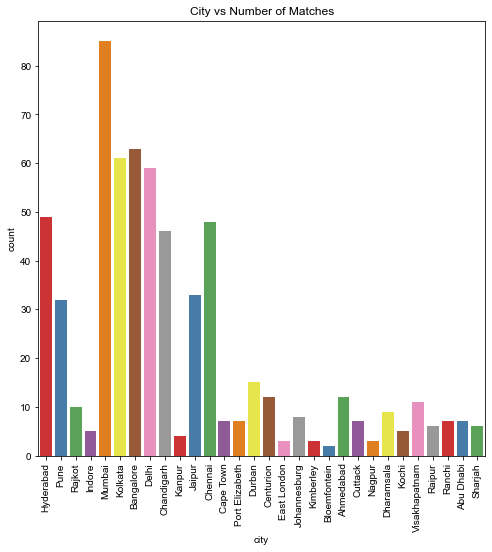

In [38]:
plt.figure(figsize=(8,8))
plt.title('City vs Number of Matches')
plt.xticks(rotation=90)
sns.countplot(x='city',data=df,palette='Set1')
sns.set_style("darkgrid")
plt.show()

In [9]:
#find all venue of mumbai city

c = df.groupby("city").get_group("Mumbai")["venue"].value_counts()
c

Wankhede Stadium              57
Dr DY Patil Sports Academy    17
Brabourne Stadium             11
Name: venue, dtype: int64

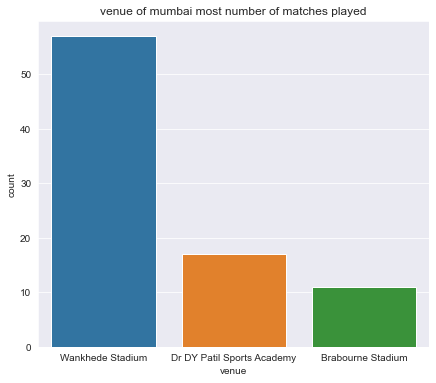

In [40]:
#now compare in which venue of mumbai most number of matches played (draw bar plot and  write down insights)
b = df.groupby("city").get_group("Mumbai")["venue"].max()
b

df[df['city']=="Mumbai"]['venue'].value_counts()
plt.figure(figsize=(7,6))
mum=df[df['city']=="Mumbai"]
sns.countplot(data=mum,x="venue")
plt.title('venue of mumbai most number of matches played')
plt.show()

In [41]:
#what is the preferred choice after winning a toss in mumbai

a = df.groupby("city").get_group("Mumbai")["toss_decision"].value_counts()
a


field    51
bat      34
Name: toss_decision, dtype: int64

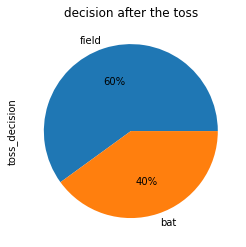

In [12]:
#graphical representation of above question

a.plot.pie(autopct = "%1.0f%%")
plt.title("decision after the toss")
plt.show()

In [13]:
#which team won most number of toss :-Mumbai Indians

df.groupby("team1").get_group("Mumbai Indians")["toss_winner"].value_counts()


Mumbai Indians                 40
Delhi Daredevils               10
Rajasthan Royals                6
Chennai Super Kings             5
Royal Challengers Bangalore     5
Kolkata Knight Riders           4
Deccan Chargers                 4
Kings XI Punjab                 2
Gujarat Lions                   2
Rising Pune Supergiant          1
Kochi Tuskers Kerala            1
Pune Warriors                   1
Sunrisers Hyderabad             1
Name: toss_winner, dtype: int64

In [42]:
#show graphical representation of above question

#df.groupby("team1").get_group("Mumbai Indians")["toss_winner"].value_counts().plot.bar()

df.value_counts("toss_winner")

toss_winner
Mumbai Indians                 83
Kolkata Knight Riders          77
Delhi Daredevils               71
Kings XI Punjab                67
Royal Challengers Bangalore    67
Chennai Super Kings            66
Rajasthan Royals               61
Deccan Chargers                43
Sunrisers Hyderabad            34
Pune Warriors                  20
Gujarat Lions                  15
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
dtype: int64

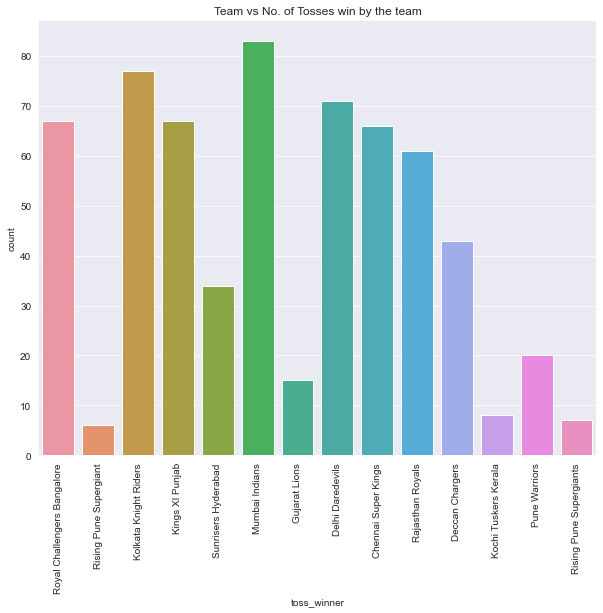

In [43]:
plt.figure(figsize=(10,8))
plt.title("Team vs No. of Tosses win by the team")
sns.countplot(x='toss_winner' ,data=df)#.sort_values('toss_winner'))
plt.xticks(rotation=90)
plt.show()


In [15]:
#find what mumbai indians preferred after winning a toss?

df.groupby("team1").get_group("Mumbai Indians")["toss_decision"].value_counts()



field    42
bat      40
Name: toss_decision, dtype: int64

In [44]:
#head to head winning count of Mumbai Indians vs Chennai Super Kings

df[((df['team1']=='Chennai Super Kings') & (df['team2']=='Mumbai Indians')) | ((df['team1']=='Mumbai Indians') & (df['team2']=='Chennai Super Kings'))]['winner'].value_counts()



Mumbai Indians         12
Chennai Super Kings     9
Name: winner, dtype: int64

In [45]:
#Which team won most of the matches in mumbai?

df.groupby("winner").get_group("Mumbai Indians")["winner"].value_counts()


Mumbai Indians    92
Name: winner, dtype: int64

In [76]:
#how many times each team won the toss and won the match in mumbai

#df.loc[df["city"]=="Mumbai"][("winner")].value_counts()
df[(df['city']=='Mumbai')& (df['toss_winner']==df['winner'])]['winner'].value_counts()

Mumbai Indians                 26
Chennai Super Kings             5
Deccan Chargers                 3
Rajasthan Royals                2
Delhi Daredevils                2
Royal Challengers Bangalore     2
Kochi Tuskers Kerala            1
Kolkata Knight Riders           1
Gujarat Lions                   1
Name: winner, dtype: int64

In [50]:
#which venue hosted most number of matches
df["venue"].value_counts().head(5)



M Chinnaswamy Stadium                        63
Eden Gardens                                 61
Feroz Shah Kotla                             59
Wankhede Stadium                             57
Rajiv Gandhi International Stadium, Uppal    49
Name: venue, dtype: int64

In [57]:
#find how many matches chennai super kings played at M Chinnaswamy stadium?
#df.groupby("venue").get_group("M Chinnaswamy Stadium")["team1"].value_counts()

df.loc[df["venue"]=="M Chinnaswamy Stadium"][df["team1"]=="Chennai Super Kings"]["id"].count()

C:\Users\Aditya\AppData\Local\Temp\ipykernel_19944\1900927920.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.loc[df["venue"]=="M Chinnaswamy Stadium"][df["team1"]=="Chennai Super Kings"]["id"].count()


4

In [54]:
#who won most matches at M Chinnaswamy stadium?--Royal Challengers Bangalore
df.groupby("venue").get_group("M Chinnaswamy Stadium")["team1"].value_counts().idxmax()

'Royal Challengers Bangalore'

In [48]:
#matches played in each year
df.value_counts("season")

season
2013    76
2012    74
2011    72
2010    60
2016    60
2008    58
2017    58
2009    57
2015    57
2014    53
dtype: int64

In [46]:
#which city hosted most number of matches in 2013 

df.loc[df["season"]==2013]["city"].value_counts()

Kolkata       8
Bangalore     8
Hyderabad     8
Delhi         8
Chennai       8
Pune          8
Jaipur        8
Mumbai        8
Chandigarh    6
Dharamsala    2
Raipur        2
Ranchi        2
Name: city, dtype: int64

In [58]:
#lets analyse ipl season held in 2013
#extract all the details of 2013 season
#here we will create yearwise groups (hint: use groupby() function)
df.groupby("season").get_group(2013).head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
381,382,2013,Kolkata,2013-04-03,Delhi Daredevils,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,6,SP Narine,Eden Gardens,S Ravi,SJA Taufel
382,383,2013,Bangalore,2013-04-04,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,normal,0,Royal Challengers Bangalore,2,0,CH Gayle,M Chinnaswamy Stadium,VA Kulkarni,C Shamshuddin
383,384,2013,Hyderabad,2013-04-05,Sunrisers Hyderabad,Pune Warriors,Pune Warriors,field,normal,0,Sunrisers Hyderabad,22,0,A Mishra,"Rajiv Gandhi International Stadium, Uppal",S Ravi,SJA Taufel
384,385,2013,Delhi,2013-04-06,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Rajasthan Royals,5,0,R Dravid,Feroz Shah Kotla,S Das,C Shamshuddin
385,386,2013,Chennai,2013-04-06,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,9,0,KA Pollard,"MA Chidambaram Stadium, Chepauk",M Erasmus,VA Kulkarni


In [63]:
year = df.groupby("season")["winner"].value_counts()
year[2013]

winner
Mumbai Indians                 13
Chennai Super Kings            12
Rajasthan Royals               11
Sunrisers Hyderabad            10
Royal Challengers Bangalore     9
Kings XI Punjab                 8
Kolkata Knight Riders           6
Pune Warriors                   4
Delhi Daredevils                3
Name: winner, dtype: int64

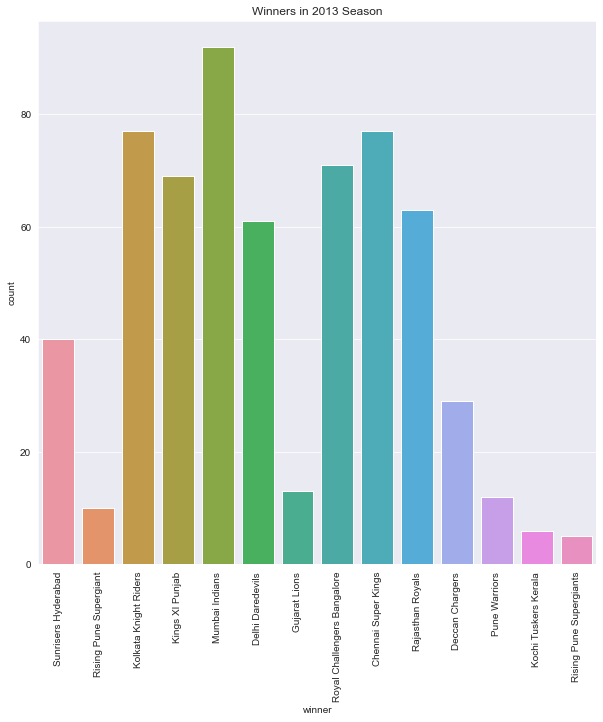

In [72]:
plt.figure(figsize=(10,10))
plt.title("Winners in 2013 Season")
sns.countplot(x='winner' ,data=df)
plt.xticks(rotation=90)
plt.show()